In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def Get_Raw_Data(filename,tmin,tmax,show_info=False):
    raw = mne.io.read_raw_gdf(filename,preload=True)
    raw.filter(8, 32., fir_design='firwin', skip_by_annotation='edge')
    points_len = int((tmax-tmin)*250 )+ 1

    #打印数据信息
    if show_info:
        info = raw.info
        print(info)
        print(info.keys())
        print(info['ch_names'])
    
    #769 -- 左手    770 -- 右手
    custom_mapping = {'769':3,'770':4}
    (events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)

    raw.drop_channels([ 'EOG:ch01', 'EOG:ch02', 'EOG:ch03'])

    epochs = mne.Epochs(raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=tmin,tmax=tmax)
    
    if show_info:
        evoked = epochs.average()
        evoked.plot(time_unit='s')
        print(epochs)
        plt.show()


    event_num = 0
    for i in enumerate(epochs['770']):
       event_num = event_num + 1
    
    
    x = np.linspace(1,points_len,points_len)/points_len + tmin

    '''右手运动想象数据'''
    right_data = np.zeros((event_num,3,points_len),dtype=np.float32)
    cnt = 0
    for i in enumerate(epochs['770']):
        right_data[cnt][0]= i[1][0]
        right_data[cnt][1]= i[1][1]
        right_data[cnt][2]= i[1][2]
        cnt = cnt+1

    right_avg = np.zeros((3,points_len,1))
    for i in range(points_len):
        d = right_data[:,0,i]
        right_avg[0][i][0] = np.average(d)

    for i in range(points_len):
        d = right_data[:,1,i]
        right_avg[1][i][0] = np.average(d)

    for i in range(points_len):
        d = right_data[:,2,i]
        right_avg[2][i][0] = np.average(d)

    if show_info:
        plt.plot(x,right_avg[0,:,0],'r',label = 'right_C3')
        #plt.plot(x,right_avg[1,:,0],'g',label = 'right_Cz')
        plt.plot(x,right_avg[2,:,0],'b',label = 'right_C4')
        plt.legend()
        plt.title('right_hand motor imagery')
        plt.xlabel('time(ms)')
        plt.show()

    '''左手运动想象数据'''
    left_data = np.zeros((event_num,3,points_len),dtype=np.float32)
    cnt = 0
    for i in enumerate(epochs['769']):
        left_data[cnt][0]= i[1][0]
        left_data[cnt][1]= i[1][1]
        left_data[cnt][2]= i[1][2]
        cnt = cnt+1

    left_avg = np.zeros((3,points_len,1))
    for i in range(points_len):
        d = left_data[:,0,i]
        left_avg[0][i][0] = np.average(d)

    for i in range(points_len):
        d = left_data[:,1,i]
        left_avg[1][i][0] = np.average(d)

    for i in range(points_len):
        d = left_data[:,2,i]
        left_avg[2][i][0] = np.average(d)
    if show_info:
        plt.plot(x,left_avg[0,:,0],'r',label = 'left_C3')
        #plt.plot(x,left_avg[1,:,0],'g',label = 'left_Cz')
        plt.plot(x,left_avg[2,:,0],'b',label = 'left_C4')
        plt.title('left_hand motor imagery')
        plt.xlabel('time(ms)')
        plt.legend()
        plt.show()


    return right_data,left_data,right_avg,left_avg



B0101T.gdf
Extracting EDF parameters from e:\19_BCIexperiment\02_CodeTest\Test1_ReadEEGData\B0101T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


D:\ANACONDA\envs\ML_py38_CU\lib\site-packages\mne\io\edf\edf.py:1131: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11136\1527170287.py:2: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filename,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 413 samples (1.652 sec)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
 chs: 6 EEG
 custom_ref_applied: False
 highpass: 8.0 Hz
 lowpass: 13.0 Hz
 meas_date: 2005-10-25 09:35:11 UTC
 nchan: 6
 projs: []
 sfreq: 250.0 Hz
>
dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 

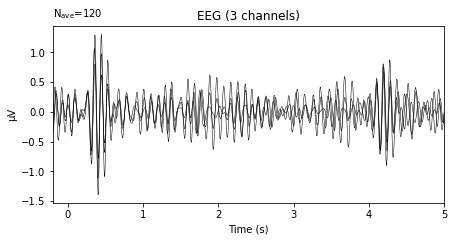

<Epochs |  120 events (all good), -0.2 - 5 sec, baseline -0.2 – 0 sec, ~3.6 MB, data loaded,
 '769': 60
 '770': 60>


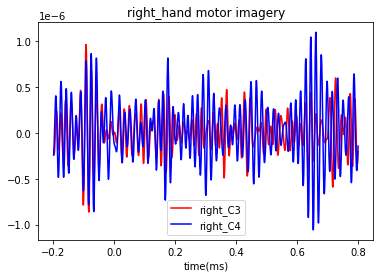

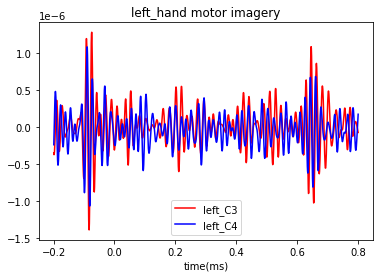

B0102T.gdf
Extracting EDF parameters from e:\19_BCIexperiment\02_CodeTest\Test1_ReadEEGData\B0102T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 552451  =      0.000 ...  2209.804 secs...


D:\ANACONDA\envs\ML_py38_CU\lib\site-packages\mne\io\edf\edf.py:1131: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11136\1527170287.py:2: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filename,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 413 samples (1.652 sec)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
 chs: 6 EEG
 custom_ref_applied: False
 highpass: 8.0 Hz
 lowpass: 13.0 Hz
 meas_date: 2005-11-07 16:38:57 UTC
 nchan: 6
 projs: []
 sfreq: 250.0 Hz
>
dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 

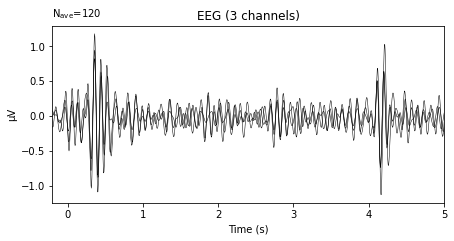

<Epochs |  120 events (all good), -0.2 - 5 sec, baseline -0.2 – 0 sec, ~3.6 MB, data loaded,
 '769': 60
 '770': 60>


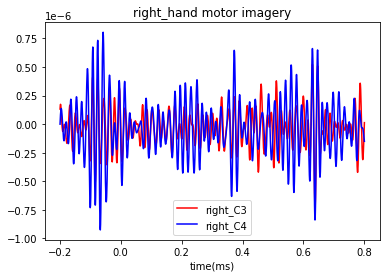

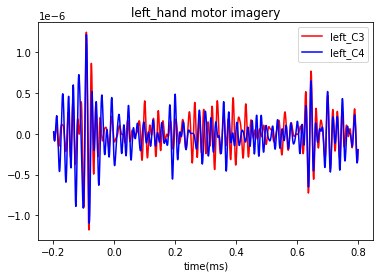

B0103T.gdf
Extracting EDF parameters from e:\19_BCIexperiment\02_CodeTest\Test1_ReadEEGData\B0103T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 469010  =      0.000 ...  1876.040 secs...


D:\ANACONDA\envs\ML_py38_CU\lib\site-packages\mne\io\edf\edf.py:1131: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11136\1527170287.py:2: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(filename,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 413 samples (1.652 sec)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
 chs: 6 EEG
 custom_ref_applied: False
 highpass: 8.0 Hz
 lowpass: 13.0 Hz
 meas_date: 2005-11-30 10:44:29 UTC
 nchan: 6
 projs: []
 sfreq: 250.0 Hz
>
dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 

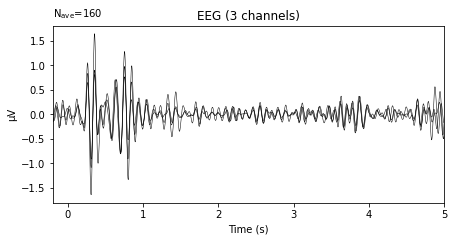

<Epochs |  160 events (all good), -0.2 - 5 sec, baseline -0.2 – 0 sec, ~4.8 MB, data loaded,
 '769': 80
 '770': 80>


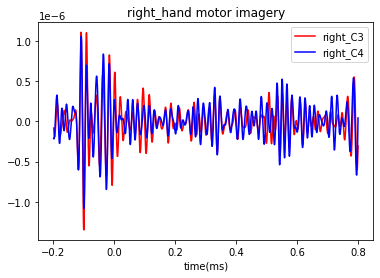

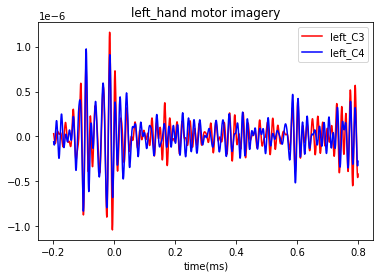

In [3]:
subject_num = 1
for i in range(subject_num):
    for j in range(3):
        filename = 'B0'+str(i+1)+'0'+str(j+1)+'T.gdf'
        print(filename)
        right_data1,left_data1,right_avg1,left_avg1 = Get_Raw_Data(filename,-0.2,5,show_info=True)
        if i==0 and j==0:
            right_data = right_data1
            left_data = left_data1
        else:
            right_data = np.concatenate((right_data,right_data1))
            left_data = np.concatenate((left_data,left_data1)) 
        

In [4]:
print('right_data shape : ',right_data.shape)
print('left_data shape : ',left_data.shape)


right_data shape :  (200, 3, 1301)
left_data shape :  (200, 3, 1301)


### 整合数据,切分数据集

##### 数据增强

In [5]:
import random

def random_list(num_range=13,sample_num=240):
    rand_list = []
    for i in range(num_range):
        rand_list.append( random.randint(0,sample_num-1))
    #print(rand_list)
    return rand_list


def data_augmentation(data_in,multi_times,segment_range=13,handclass='left_hand'):
    data_aug_count = int(multi_times*data_in.shape[0])
    #print('数据增强的个数：',data_aug_count)
    #print('data in shape:',data_in.shape)
    segment_points = int(data_in.shape[2] / segment_range)
    data_aug = np.zeros((data_aug_count,data_in.shape[1],data_in.shape[2]))
    for i in range(data_aug_count):
       
        rand_list = random_list(num_range=segment_range,sample_num=data_in.shape[0])
        for k in range(segment_range):
            start_seg = k * segment_points
            end_seg = start_seg + segment_points
            data_aug[i,:,start_seg:end_seg] = data_in[rand_list[k],:,start_seg:end_seg]

    if handclass == 'left_hand':
        label_aug = np.zeros((data_aug_count,))
    else:
        label_aug = np.ones((data_aug_count,))

    #2s滑动窗口
    '''
    data_aug2 = np.zeros((data_aug_count*4,data_in.shape[1],data_in.shape[1],250))
    for i in range(data_aug_count):
        for j in range(4):
            start_se = j*250
            end_se = start_se+250
            data_aug2[4*i+j,:,:] =  data_aug[i,:,start_se:end_se]
    '''
    return data_aug,label_aug


        


In [6]:
def Normalization(X):
    m = np.mean(X,axis=2,keepdims=True)
    std = np.std(X,axis=2,keepdims=True)

    #X_mean = ( X - m ) * 10**6
    X_mean = (X-m) * 10**6
    return X_mean

In [7]:
from sklearn.model_selection import train_test_split
#step 1 ：将原始信号规范化  (x-mean)/std ,并且对数据降采样
#step 2 : 将原始数据切分出训练集，验证集与测试集   6:2:2
#step 3 : 将训练集数据进行数据增强，验证集核测试集数据不动
#step 4 : 整合训练集，验证集和测试集的左右手数据

#step 1 ---------------------------------------------------------------------
#信号规范化
for i in range(left_data.shape[0]):
    for j in range(left_data.shape[1]):
        #left_data[i,j,:] = (left_data[i,j,:] - np.mean(left_data[i,j,:])) / np.std(left_data[i,j,:])
        left_data[i,j,:] = (left_data[i,j,:] - np.mean(left_data[i,j,:])) * 10**6
left_label = np.zeros((left_data.shape[0],))

for i in range(right_data.shape[0]):
    for j in range(right_data.shape[1]):
        #right_data[i,j,:] = (right_data[i,j,:] - np.mean(right_data[i,j,:])) / np.std(right_data[i,j,:])
        right_data[i,j,:] = (right_data[i,j,:] - np.mean(right_data[i,j,:])) * 10**6
right_label = np.ones((right_data.shape[0],))

#信号降采样

downsamp_ratio = 2
samp_points = np.linspace(1,right_data.shape[2],int(right_data.shape[2] / downsamp_ratio),dtype=int)-1
print('降采样点数 :  ' , samp_points.shape)

left_data_downsamp = np.zeros((left_data.shape[0],left_data.shape[1],len(samp_points)))
for i in range(left_data_downsamp.shape[0]):
    for j in range(left_data_downsamp.shape[1]):
        left_data_downsamp[i,j,:] = left_data[i,j,samp_points]

print('left_data_downsamp size is : ',left_data_downsamp.shape)

right_data_downsamp = np.zeros((right_data.shape[0],right_data.shape[1],len(samp_points)))
for i in range(right_data_downsamp.shape[0]):
    for j in range(right_data_downsamp.shape[1]):
        right_data_downsamp[i,j,:] = right_data[i,j,samp_points]

print('right_data_downsamp size is : ',right_data_downsamp.shape)



#step 2 ---------------------------------------------------------------------

#左手数据数据划分
ldata_train_step2,ldata_valid_test,llabel_train_step2,llabel_valid_test  = train_test_split(left_data_downsamp,
                                                                                            left_label, 
                                                                                            test_size=0.3,
                                                                                            random_state=42)
ldata_valid,ldata_test,llabel_valid,llabel_test  = train_test_split(ldata_valid_test,
                                                                    llabel_valid_test, 
                                                                    test_size=0.5,
                                                                    random_state=42)

#右手数据数据划分
rdata_train_step2,rdata_valid_test,rlabel_train_step2,rlabel_valid_test  = train_test_split(right_data_downsamp,
                                                                                            right_label, 
                                                                                            test_size=0.4,
                                                                                            random_state=42)
rdata_valid,rdata_test,rlabel_valid,rlabel_test  = train_test_split(rdata_valid_test,
                                                                    rlabel_valid_test, 
                                                                    test_size=0.5,
                                                                    random_state=42)

#step 3 ---------------------------------------------------------------------
left_data_aug,left_label_aug = data_augmentation(ldata_train_step2,16,13,'left_hand')
right_data_aug,right_label_aug = data_augmentation(rdata_train_step2,16,13,'right_hand')
ldata_train_step3 = np.concatenate((ldata_train_step2,left_data_aug),dtype=np.float64)
llabel_train_step3 = np.concatenate((llabel_train_step2,left_label_aug))
rdata_train_step3 = np.concatenate((rdata_train_step2,right_data_aug),dtype=np.float64)
rlabel_train_step3 = np.concatenate((rlabel_train_step2,right_label_aug))


print('slid window data : ',left_data_aug.shape)
#滑动窗口进行数据增强


#step 4 ---------------------------------------------------------------------
all_data_train_step4 = np.concatenate((ldata_train_step3,rdata_train_step3),dtype=np.float64)
all_label_train_step4 = np.concatenate((llabel_train_step3,rlabel_train_step3))


print('all_data_train_step4 shape:   ',all_data_train_step4.shape)

all_data_valid_step4 = np.concatenate((ldata_valid,rdata_valid),dtype=np.float64)
all_label_valid_step4 = np.concatenate((llabel_valid,rlabel_valid),dtype=np.float64)
print('all_data_valid_step4 shape:   ',all_data_valid_step4.shape)

all_data_test_step4 = np.concatenate((ldata_test,rdata_test),dtype=np.float64)
all_label_test_step4 = np.concatenate((llabel_test,rlabel_test),dtype=np.float64)
print('all_data_test_step4 shape:   ',all_data_test_step4.shape)



降采样点数 :   (650,)
left_data_downsamp size is :  (200, 3, 650)
right_data_downsamp size is :  (200, 3, 650)
slid window data :  (2240, 3, 650)
all_data_train_step4 shape:    (4420, 3, 650)
all_data_valid_step4 shape:    (70, 3, 650)
all_data_test_step4 shape:    (70, 3, 650)


### 构建卷积模型

#### 导入pytorch库文件

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset,TensorDataset



#### 创建dataloader

In [9]:
batch_size = 128

data_train_tor = torch.from_numpy(all_data_train_step4)
data_train_tor = data_train_tor.float()
print(data_train_tor.size())

data_valid_tor = torch.from_numpy(all_data_valid_step4)
data_valid_tor = data_valid_tor.float()
print(data_valid_tor.size())

data_test_tor = torch.from_numpy(all_data_test_step4)
data_test_tor = data_test_tor.float()
print(data_test_tor.size())


label_train_tor = torch.from_numpy(all_label_train_step4)
label_train_tor = label_train_tor.long()
label_valid_tor = torch.from_numpy(all_label_valid_step4)
label_valid_tor = label_valid_tor.long()
label_test_tor = torch.from_numpy(all_label_test_step4)
label_test_tor = label_test_tor.long()

#改成四维张量   样本数 * 通道数 * 高 * 宽 
data_train_tor = data_train_tor.reshape(all_data_train_step4.shape[0],1,all_data_train_step4.shape[1],
                                        all_data_train_step4.shape[2])
print(data_train_tor.size())

data_valid_tor = data_valid_tor.reshape(all_data_valid_step4.shape[0],1,all_data_valid_step4.shape[1],
                                        all_data_valid_step4.shape[2])
print(data_test_tor.size())

data_test_tor = data_test_tor.reshape(all_data_test_step4.shape[0],1,all_data_test_step4.shape[1],
                                        all_data_test_step4.shape[2])
print(data_test_tor.size())




train_dataset = TensorDataset(data_train_tor,label_train_tor)
valid_dataset = TensorDataset(data_valid_tor,label_valid_tor)
test_dataset = TensorDataset(data_test_tor,label_test_tor)


train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)




torch.Size([4420, 3, 650])
torch.Size([70, 3, 650])
torch.Size([70, 3, 650])
torch.Size([4420, 1, 3, 650])
torch.Size([70, 3, 650])
torch.Size([70, 1, 3, 650])


In [10]:

print(data_train_tor.dtype)
print(label_train_tor.dtype)

torch.float32
torch.int64


In [11]:
for i,data in enumerate(train_loader):
    
    print('num:',i,' |train data size: ',data[0].shape,'| train label size: ',data[1].shape)


num: 0  |train data size:  torch.Size([128, 1, 3, 650]) | train label size:  torch.Size([128])
num: 1  |train data size:  torch.Size([128, 1, 3, 650]) | train label size:  torch.Size([128])
num: 2  |train data size:  torch.Size([128, 1, 3, 650]) | train label size:  torch.Size([128])
num: 3  |train data size:  torch.Size([128, 1, 3, 650]) | train label size:  torch.Size([128])
num: 4  |train data size:  torch.Size([128, 1, 3, 650]) | train label size:  torch.Size([128])
num: 5  |train data size:  torch.Size([128, 1, 3, 650]) | train label size:  torch.Size([128])
num: 6  |train data size:  torch.Size([128, 1, 3, 650]) | train label size:  torch.Size([128])
num: 7  |train data size:  torch.Size([128, 1, 3, 650]) | train label size:  torch.Size([128])
num: 8  |train data size:  torch.Size([128, 1, 3, 650]) | train label size:  torch.Size([128])
num: 9  |train data size:  torch.Size([128, 1, 3, 650]) | train label size:  torch.Size([128])
num: 10  |train data size:  torch.Size([128, 1, 3,

In [12]:
class CNN_Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1,5,(3,1),(3,1)),  #in_channel , out_channel , kernel_size , stride
            nn.ReLU(),
            nn.Conv2d(5,5,(1,10),3),
            nn.ReLU(),
            nn.Conv2d(5,10,(1,10),3)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(1,5,(3,1),(3,1)),  #in_channel , out_channel , kernel_size , stride
            nn.ReLU(),
            nn.Conv2d(5,5,(1,5),3),
            nn.ReLU(),
            nn.Conv2d(5,10,(1,5),3)
        )

        self.fc = nn.Sequential(
            nn.Linear(10*1*56,64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32,2)

        )
    
    def forward(self,img):
        feature1 = self.conv(img)
        feature2 = self.conv2(img)
        
        #print('feature1 shape: ',feature1.size())
        #print('feature2 shape: ',feature2.size())
        
        feature = torch.cat((feature1,feature2),dim=3)
        output = self.fc(feature.reshape(img.shape[0],-1))
        return output

    

In [13]:
netxx = CNN_Net()
for i,data in enumerate(train_loader):
    X = data[0]
    y = data[1]
    print(X.shape)
    y_hat = netxx(X)
    print(y_hat.argmax(dim=1))
    print(y_hat)


torch.Size([128, 1, 3, 650])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x1400 and 560x64)

In [ ]:
a = torch.arange(24).reshape(2,3,4)
b = torch.arange(12).reshape(2,3,2)
print(torch.cat((a,b),dim=2))

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
print('the current device is : ',device)

In [ ]:
def evaluate_accuracy_gpu(net,test_dataloader,
                        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')):
    """使用GPU计算模型再数据集上面的精度"""
    acc_sum , n = 0.0,0
    with torch.no_grad():
        for i,data in enumerate(test_dataloader):
            X = data[0]
            y = data[1]


            net.eval() #评估模式
            acc_sum += (net(X.to(device)).argmax(dim=1) == 
            y.to(device)).float().sum().cpu().item()
            net.train() #改回训练模式

            
            '''
            if  isinstance(net,torch.nn.Module):
                net.eval() #评估模式
                acc_sum += (net(X.to(device)).argmax(dim=1) == 
                            y.to(device)).float().sum().cpu().item()
                net.train() #改回训练模式
            else: #自定义模型  3.13节之后不会用到,不考虑GPU
                if( 'is_training ' in net.__code__.co_varnames ):
                    #如果有is_training这个参数
                    #将is_training设置维False
                    acc_sum += (net(X,is_training=False).argmax(dim=1) == y).float.sum().item()
                else:
                    acc_sum += (net(X).argmax(dim=1)==y).float().sum().item()
            '''
            #y.shape[0]为一个batch的样本数
            n += y.shape[0]
    return acc_sum/n

In [ ]:
def train_CNN(net,train_dataloader,valid_dataloader,batch_size,optimizer,device,num_epochs):
    net = net.to(device)
    print('training on',device)

    loss = torch.nn.CrossEntropyLoss()
    batch_count = 0
    
   
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum ,n,start = 0.0,0.0,0,time.time()
        all_miss_count = 0
        for i,data in enumerate(train_dataloader):
            X = data[0]
            y = data[1]
            X = X.to(device)
            y = y.to(device)
            y_hat = net(X)
            
            l = loss(y_hat,y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()

            train_l_sum += l.cpu()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().cpu()
            n += y.shape[0]
            batch_count += 1
            all_miss_count += (y_hat.argmax(dim=1) == y).sum().cpu()

        valid_acc = evaluate_accuracy_gpu(net,valid_dataloader,device)
        print('epoch %d , loss %.4f, train acc %.3f, valid acc %.3f, time %.1f sec ' % 
                (epoch+1 , train_l_sum/batch_count ,  train_acc_sum/n , 
                valid_acc,time.time()-start))

In [ ]:
lr , num_epochs = 0.0001 , 500

net = CNN_Net()
optimizer = torch.optim.Adam(net.parameters(),lr=lr)

start_time = time.time()

train_CNN(net,train_dataloader=train_loader,valid_dataloader=valid_loader,batch_size=batch_size,optimizer=optimizer,
            device = device,num_epochs = num_epochs)
end_time = time.time()
used_time = end_time - start_time
print('训练的总时间为： %.1f sec' %(used_time))

In [ ]:
import collections
a = ['a','b','b','c','c','c','d']
cnt =  collections.Counter(a)
print(cnt)